<a href="https://colab.research.google.com/github/vivirocha/Bootcamp_MachineLearning/blob/main/Trabalho1_M%C3%B3dulo_2_Modelos_Preditivos_e_S%C3%A9ries_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bootcamp IGTI - Eng. Machine Learning** <br>
*Trabalho Prático 1 - Módulo 2*
<br>
<br>
Tema: Modelos Preditivos e Séries Temporais

In [176]:
#Importando bibliotecas Numpy e Pandas
import numpy as np
import pandas as pd

In [177]:
bike = pd.read_csv("bike-sharing.csv")

Esta atividade tem como objetivo analisar os dados coletados de compartilhamento de bicicletas em uma cidade, coletados pela Universidade do Porto.


A seguir, um descritivo dos dados coletados: <br> 
<br>
**rec_id**: índice do registro de locação. <br>
**datetime**: data.<br>
**season**: estação do ano (1: inverno, 2: primavera, 3: verão, 4: outono). Relativo ao hemisfério norte. <br>
**year**: ano (0: 2011, 1:2012). <br>
**month**: mês (1 a 12). <br>
**hour**: hora do dia (0 a 23). <br>
**is_holiday**: booleano indicando feriado. <br>
**weekday**: dia da semana (0: domingo, 1: segunda-feira, …, 6: sábado). <br>
**is_workingday**: booleano indicando dia útil. <br>
**weather_condition**: (1: limpo, 2: nublado, 3: chuva leve, 4: chuva forte). <br>
**temp**: temperatura escalada entre 0 e 1. Valor original em graus Celsius: -8 a 39. <br>
**atemp**: sensação térmica escalada entre 0 e 1. Valor original em graus Celsius: -16 a 50. <br>
**humidity**: umidade relativa (0 a 1). <br>
**windspeed**: velocidade do vento escalada entre 0 e 1 (máximo original: 67). <br>
**casual**: número de locações para usuários casuais. <br>
**registered**: número de locações para usuários registrados. <br>
**total_count**: contador total de aluguéis (casual+registered).<br>
<br>
Antes de cada código, colocarei a pergunta a ser respondida. 

Qual é o tamanho do dataset?

In [178]:
bike.shape

(17379, 17)

Nosso dataset tem 17.379 observações e 17 variáveis.

Vamos utilizar o comando head para vermos os primeiros dados do nosso dataset.

In [179]:
bike.head()

,datetime,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Modificando os nomes das colunas, irei traduzir para o português do Brasil.

In [180]:
bike.rename(columns={'datetime': 'periodo', 'rec_id': 'id', 'season':'estacoes','year': 'ano', 'month':'mes', 'hour': 'hora', 'is_holiday': 'feriado', 'weekday': 'dia_da_semana', 'is_workingday':'dia_util', 'weather_condition':'condicao_climatica', 'temp': 'temperatura', 'atemp': 'sensacao_termica', 'humidity': 'umidade', 'windspeed':'velocidade_vento', 'casual':'locacoes_casuais', 'registered':'locacoes_registradas', 'total_count': 'total_locacoes'},
            inplace=True)

Vamos novamente usar o comando head() para vermos as alterações.

In [181]:
bike.head()

,periodo,id,estacoes,ano,mes,hora,feriado,dia_da_semana,dia_util,condicao_climatica,temperatura,sensacao_termica,umidade,velocidade_vento,locacoes_casuais,locacoes_registradas,total_locacoes
0,2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Iremos alterar a ordem das colunas.

In [182]:
bike = bike[['id', 'periodo', 'dia_da_semana', 'dia_util', 'feriado', 'hora', 'mes', 'ano', 'estacoes', 'condicao_climatica', 'temperatura', 'sensacao_termica', 'umidade', 'velocidade_vento', 'locacoes_casuais', 'locacoes_registradas', 'total_locacoes' ]]

Novamente vamos dar o comando head() para vermos as alterações.

In [183]:
bike.head()

,id,periodo,dia_da_semana,dia_util,feriado,hora,mes,ano,estacoes,condicao_climatica,temperatura,sensacao_termica,umidade,velocidade_vento,locacoes_casuais,locacoes_registradas,total_locacoes
0,1,2011-01-01,6,0,0,0,1,0,1,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,6,0,0,1,1,0,1,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,6,0,0,2,1,0,1,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,6,0,0,3,1,0,1,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,6,0,0,4,1,0,1,1,0.24,0.2879,0.75,0.0,0,1,1


Qual a média da coluna **'velocidade_vento'**?

In [184]:
mediavento = np.mean(bike['velocidade_vento'])
mvround = round(mediavento, 2)
mvround

0.19

A média da coluna **'velocidade_vento'** é 0.19

Qual a média da coluna **'temperatura'**?

In [185]:
mediatemp = np.mean(bike['temperatura'])
mtround = round(mediatemp, 2)
mtround

0.5

A média da coluna **'temperatura'** é 0.47 e arredondada é 0.50

Quantos registros existem para o ano de 2011 para o ano de 2012?

In [186]:
bike.groupby('ano').count()

,id,periodo,dia_da_semana,dia_util,feriado,hora,mes,estacoes,condicao_climatica,temperatura,sensacao_termica,umidade,velocidade_vento,locacoes_casuais,locacoes_registradas,total_locacoes
ano,,,,,,,,,,,,,,,,
0,8645,8645,8645,8645,8645,8645,8645,8645,8645,8645,8645,8645,8645,8645,8645,8645
1,8734,8734,8734,8734,8734,8734,8734,8734,8734,8734,8734,8734,8734,8734,8734,8734


Existem 8.645 registros para o ano de 2011 e 8.734 registros para o ano de 2012.

 Quantas locações de bicicletas foram efetuadas em 2011 e quantas foram efetuadas em 2012?


In [187]:
#Vamos selecionar apenas os dados do ano 0 (2011) em um
a2011=bike['ano']==0
#Criando um filtro para os dados do anos 2011
filtro1 = bike[a2011]
filtro1.total_locacoes.sum()


1243103

In [188]:
#Criando um filtro para os dados do anos 2011
filtro1 = bike[a2011]
filtro1.total_locacoes.sum()


1243103

In [189]:
#Faremos o mesmo para o ano de 2012. 
a2012=bike['ano']==1
filtro2 = bike[a2012]
filtro2.total_locacoes.sum()

2049576

Em 2011 houveram 1.243.103 locações de bicicletas e em 2012 houveram 2.049.576.

Qual estação do ano contém a **maior** média de locações de bicicletas? 
Qual estação do ano contém a **menor** média de locações de bicicletas? 

In [190]:
np.unique(bike['estacoes'])

array([1, 2, 3, 4])

In [191]:
s1=bike['estacoes']==1   #criando a variáel s1 com apenas a estação 1 (inverno).
f1 = bike[s1]            #variável f1 com os dados da s1.
tem1 = f1.total_locacoes.mean() #variável tem1 com a média das locações da f1.
temp1 = round(tem1, 2)   #variável temp1 com o arredondamento de duas casasn da tem1.
temp1

111.11

In [192]:
s2=bike['estacoes']==2
f2 = bike[s2]
tem2 = f2.total_locacoes.mean()
temp2 = round(tem2, 2)
temp2


208.34

In [193]:
s3=bike['estacoes']==3
f3 = bike[s3]
tem3 = f3.total_locacoes.mean()
temp3 = round(tem3, 2)
temp3

236.02

In [194]:
s4=bike['estacoes']==4
f4 = bike[s4]
tem4 = f4.total_locacoes.mean()
temp4 = round(tem4, 2)
temp4


198.87

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

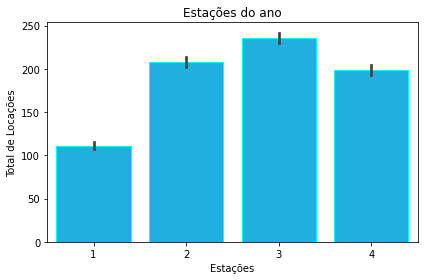

In [196]:
fig, ax = plt.subplots()
sns.barplot(x=bike['estacoes'], y=bike['total_locacoes'], ax=ax, data=bike,
            color = 'DeepSkyBlue',
            edgecolor = 'Aqua')       #definindo x e y.
ax.set(title = "Estações do ano",     #Título do gráfico.
       xlabel = "Estações",           #Título eixo x.
       ylabel = "Total de Locações"); #Título eixo y.
fig.tight_layout();                   #otimizar espaço da figura

Qual horário do dia contém a **maior** média de locações de bicicletas?  <br>
Qual horário do dia contém a **menor** média de locações de bicicletas? 



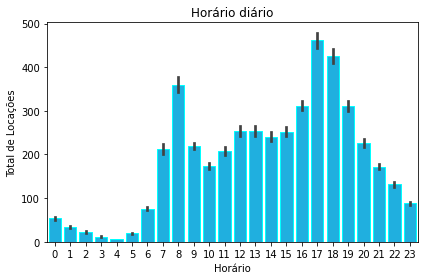

In [197]:
fig, ax = plt.subplots()
sns.barplot(x=bike['hora'], y=bike['total_locacoes'], ax=ax, data=bike,
            color = 'DeepSkyBlue',
            edgecolor = 'Aqua')       #definindo x e y.
ax.set(title = "Horário diário",      #Título do gráfico.
       xlabel = "Horário",            #Título eixo x.
       ylabel = "Total de Locações"); #Título eixo y.
fig.tight_layout();                   #otimizar espaço da figura

Que dia da semana contém a **maior** média de locações de bicicletas? <br>
Que dia da semana contém a **menor** média de locações de bicicletas? 



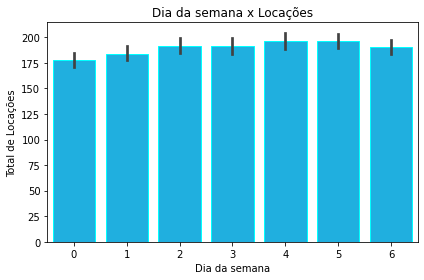

In [198]:
fig, ax = plt.subplots()
sns.barplot(x=bike['dia_da_semana'], y=bike['total_locacoes'], ax=ax, data=bike,
            color = 'DeepSkyBlue',
            edgecolor = 'Aqua')              #definindo x e y.
ax.set(title = "Dia da semana x Locações",   #Título do gráfico.
       xlabel = "Dia da semana",             #Título eixo x.
       ylabel = "Total de Locações");        #Título eixo y.
fig.tight_layout();                           #otimizar espaço da figura

Às quartas-feiras (weekday = 3), qual horário do dia contém a **maior** média de locações de bicicletas? 

In [199]:
quarta = bike[bike['dia_da_semana']==3].groupby('hora')['total_locacoes'].mean()
quarta

hora
0      34.557692
1      15.336538
2       7.813725
3       4.888889
4       4.968750
5      25.750000
6     107.807692
7     303.980769
8     488.326923
9     238.528846
10    131.894231
11    152.201923
12    193.903846
13    185.826923
14    170.548077
15    181.288462
16    272.961538
17    513.144231
18    494.029126
19    357.504854
20    256.660194
21    194.669903
22    143.689320
23     83.737864
Name: total_locacoes, dtype: float64

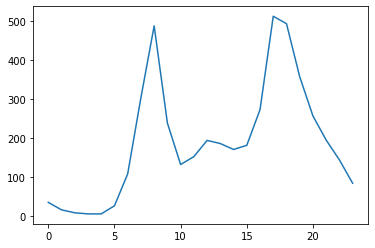

In [200]:
plt.plot(quarta)

Aos sábados (dia_da_semana== 6), qual horário do dia contém a **maior** média de locações de bicicletas? 

In [201]:
sabado = bike[bike['dia_da_semana']==6].groupby('hora')['total_locacoes'].mean()
sabado

hora
0      94.304762
1      67.780952
2      50.495238
3      22.885714
4       7.657143
5       8.291262
6      21.000000
7      45.961905
8     114.476190
9     186.790476
10    263.723810
11    328.609524
12    375.380952
13    385.371429
14    381.333333
15    382.428571
16    366.142857
17    334.409524
18    292.048077
19    239.932692
20    180.865385
21    156.000000
22    139.663462
23    115.855769
Name: total_locacoes, dtype: float64

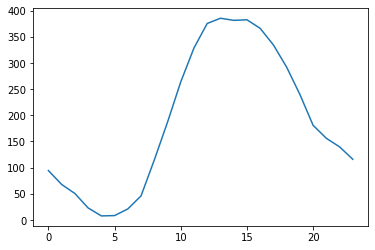

In [202]:
plt.plot(sabado)